In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [7]:
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [10]:
from sklearn import metrics
rfr.score(bos_X_test, bos_y_test)
bos_y_test_pred = rfr.predict(bos_X_test)
metrics.r2_score(bos_y_test, bos_y_test_pred)

0.8721182042634867

In [11]:
metrics.explained_variance_score(
    bos_y_test, bos_y_test_pred
)

0.8724890451227875

In [12]:
metrics.mean_absolute_error(
    bos_y_test, bos_y_test_pred
)

2.0839802631578945

In [13]:
metrics.mean_squared_error(
    bos_y_test, bos_y_test_pred
)

9.52886846710526

In [14]:
metrics.mean_squared_log_error(
    bos_y_test, bos_y_test_pred
)

0.02128263061776433

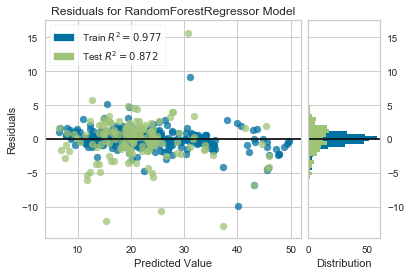

In [15]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.score(bos_X_test, bos_y_test)
rpv.poof()
#fig.savefig("images/mlpr_1501.png", dpi=300)

In [19]:
import statsmodels.stats.api as sms
resids = bos_y_test - rfr.predict(bos_X_test)
hb = sms.het_breuschpagan(resids, bos_X_test)
labels = [
    "Lagrange multiplier statistic",
    "p-value",
    "f-value",
    "f p-value",
]
for name, num in zip(labels, hb):
    print(f"{name}: {num:.2}")

Lagrange multiplier statistic: 3.6e+01
p-value: 0.00036
f-value: 3.3
f p-value: 0.00022


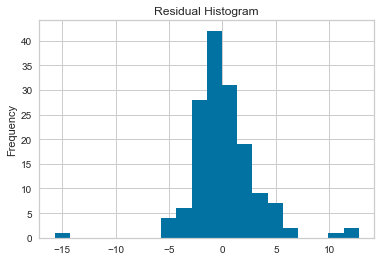

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
)
#fig.savefig("images/mlpr_1502.png", dpi=300)

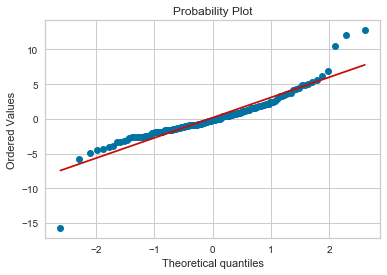

In [21]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids, plot=ax)
#fig.savefig("images/mlpr_1503.png", dpi=300)

In [22]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.1962230021010155, pvalue=1.3283596864921421e-05)

/Users/matt/.env/364/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


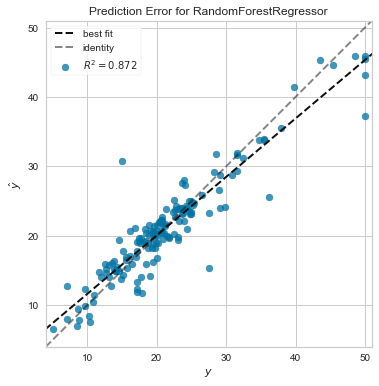

In [23]:
from yellowbrick.regressor import (
    PredictionError,
)
fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()
#fig.savefig("images/mlpr_1504.png", dpi=300)

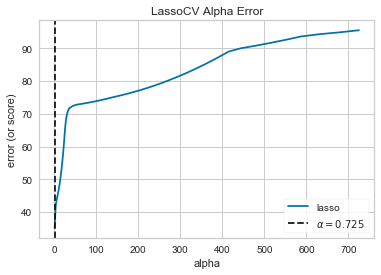

In [24]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import (
    AlphaSelection,
)
fig, ax = plt.subplots(figsize=(6, 4))
asv = AlphaSelection(LassoCV(cv=5))
asv.fit(bos_X, bos_y)
asv.poof()
#fig.savefig("images/asv.png", dpi=300)